# Introduction to the Project:

### We will look at a few ways of analyzing the risk of a stock, based on its previous performance history.We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

1) What was the change in price of the stock over time?

2) What was the daily return of the stock on average?

3) What was the moving average of the various stocks?

4) What was the correlation between different stocks' closing prices?

5) What was the correlation between different stocks' daily returns?

6) How much value do we put at risk by investing in a particular stock?

7) How can we attempt to predict future stock behavior?

# Basic Analysis of Stock Information

In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import DataReader, wb

# For time stamps
from datetime import datetime

# For division
from __future__ import division

Let's use Yahoo and pandas to grab some data for some tech stocks.

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()

start = datetime(end.year - 1, end.month, end.day)       # end.year-1 meaning from one year ago 

In [3]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [4]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-16,162.509995,160.149994,161.940002,160.949997,27671600.0,158.552673
2017-08-17,160.710007,157.839996,160.520004,157.860001,27940600.0,155.508698
2017-08-18,159.500000,156.720001,157.860001,157.500000,27428100.0,155.154068
2017-08-21,157.889999,155.110001,157.500000,157.210007,26368500.0,154.868378
2017-08-22,160.000000,158.020004,158.229996,159.779999,21604600.0,157.400101


In [5]:
# Globals() creates all ticker variables to Global Variables

Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

In [6]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,176.074308,173.347589,174.653202,174.759328,2.960953e+07,173.233262
std,13.344921,13.439518,13.325782,13.474973,1.271060e+07,14.039708
min,151.830002,149.160004,149.990005,150.550003,3.946456e+06,148.307571
25%,166.800003,163.369995,164.119995,164.339996,2.081060e+07,163.136581
50%,174.949997,172.080002,173.440002,173.250000,2.613200e+07,171.723251
75%,187.190002,184.029999,185.259995,185.460007,3.500530e+07,184.752045
max,212.449997,211.470001,211.750000,212.289993,8.659380e+07,212.289993


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2017-08-16 to 2018-08-16
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of the stocks

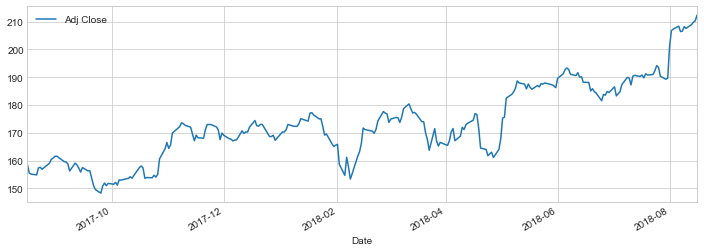

In [8]:
AAPL['Adj Close'].plot(legend=True, figsize = (12,4))
plt.show()

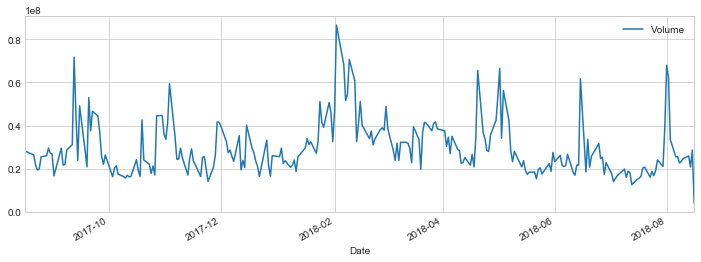

In [9]:
AAPL['Volume'].plot(legend=True, figsize = (12,4))
plt.show()

### Let's go ahead and plot out several moving averages

In [10]:
ma_day=[10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=pd.rolling_mean(AAPL['Adj Close'],ma)

C:\Users\ARJ\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  """
C:\Users\ARJ\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  """
C:\Users\ARJ\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  """


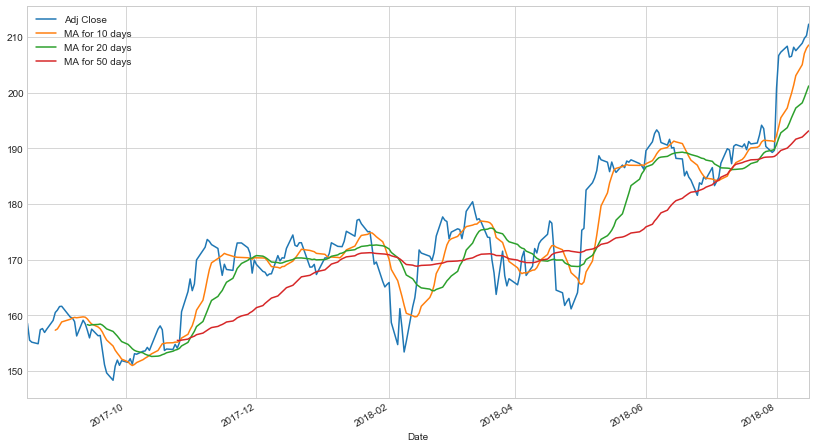

In [11]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(14,8))
plt.show()
# Subplot = False, because we want all plot in a single graph, otherwise it would plot different plots for each column

# Section 2 - Daily Return Analysis

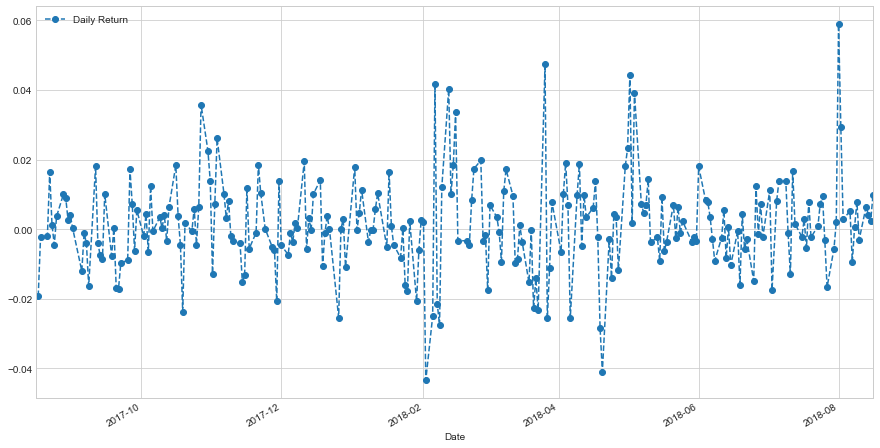

In [12]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize = (15,8), legend= True, linestyle='--', marker ='o')
plt.show()

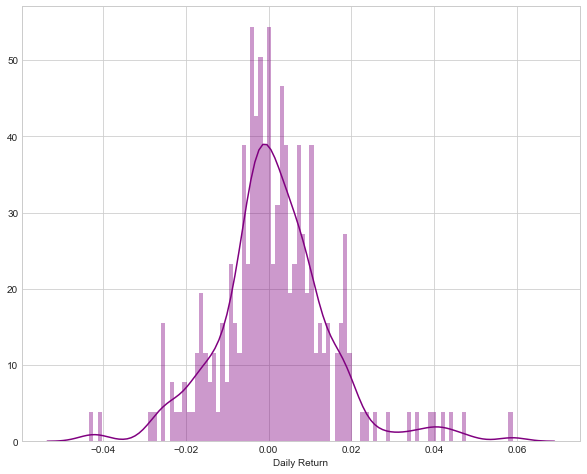

In [13]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple', ax=ax)
plt.show()

If we wanted to analyze the returns of all the stocks in our list, we need to build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [14]:
closing_df = DataReader(tech_list, 'yahoo', start,end)['Adj Close']

In [15]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-08-16,158.552673,978.179993,926.960022,72.346153
2017-08-17,155.508698,960.570007,910.979980,71.118286
2017-08-18,155.154068,958.469971,910.669983,71.206688
2017-08-21,154.868378,953.289978,906.659973,70.872696
2017-08-22,157.400101,966.900024,924.690002,71.864822


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like the Apple stock.

In [16]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-08-16,NaN,NaN,NaN,NaN
2017-08-17,-0.019199,-0.018003,-0.017239,-0.016972
2017-08-18,-0.002280,-0.002186,-0.000340,0.001243
2017-08-21,-0.001841,-0.005404,-0.004403,-0.004690
2017-08-22,0.016348,0.014277,0.019886,0.013999


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

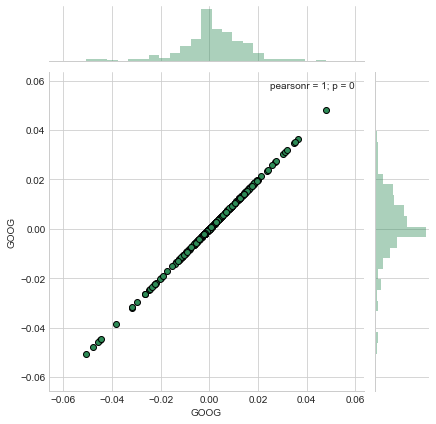

In [17]:
# Comparing Google to itself should show a perfectly linear relationship

sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen', linewidths=1, edgecolor= 'k')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare Google and Microsoft the same way.

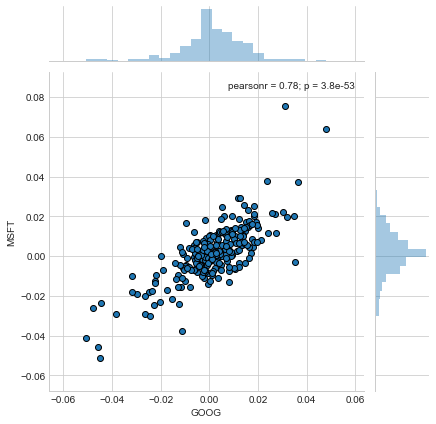

In [18]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind= 'scatter', linewidths=1, edgecolor= 'k')
plt.show()

Pearson value is good, meaning it is strong positive correlation between Google and Microsoft closing prices

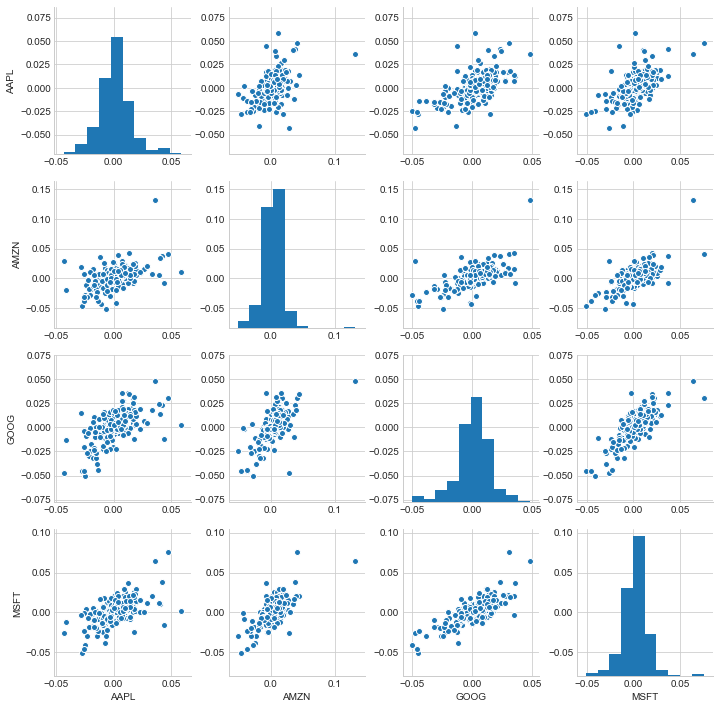

In [19]:
sns.pairplot(tech_rets.dropna())

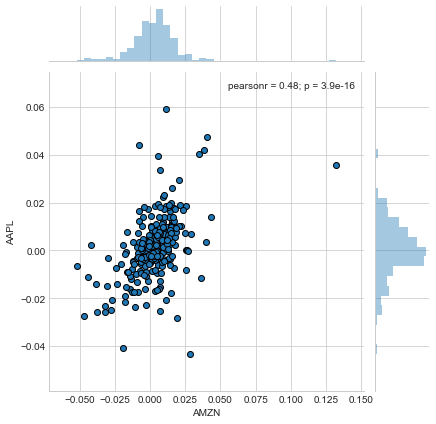

In [27]:
sns.jointplot('AMZN', 'AAPL', tech_rets, kind= 'scatter', linewidths=1, edgecolor= 'k')
plt.show()

There is a weak correlation between Amazon and Apple

We could have also analyzed the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

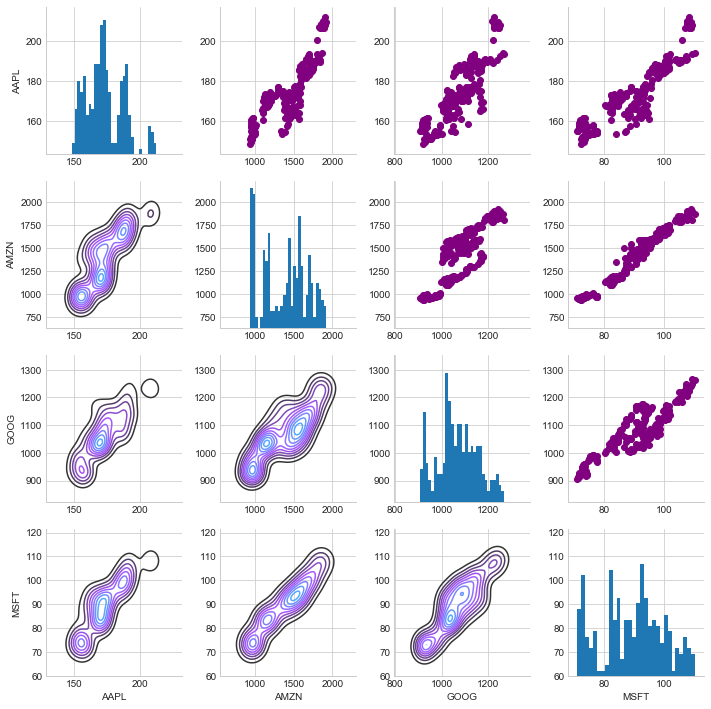

In [21]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter, color= 'purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

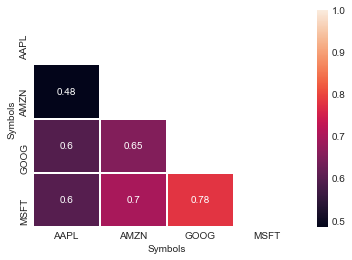

In [22]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
corr = tech_rets.dropna().corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True, linewidth=1,mask=mask)

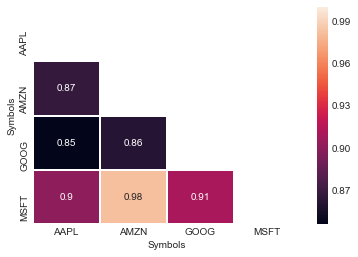

In [23]:
corr_closing = closing_df.dropna().corr()
mask = np.zeros_like(corr_closing, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_closing,annot=True, linewidth=1,mask=mask)

# Risk Analysis

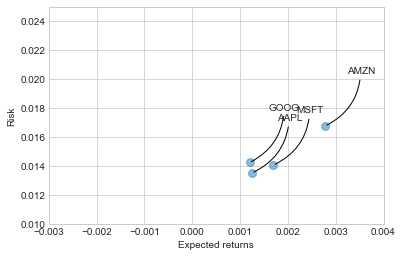

In [24]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset pixels', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [25]:
zip(rets.columns)

[('AAPL',), ('AMZN',), ('GOOG',), ('MSFT',)]